In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
# Start solution here

#1: Load data and explore

#merge all csv files
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dftrain1 = pd.merge(train,features,on=['Store','Date', 'IsHoliday'])
dftrain2 = pd.merge(dftrain1, stores, on='Store')
dftest1 = pd.merge(test,features,on=['Store','Date','IsHoliday'])
dftest2 = pd.merge(dftest1,stores, on='Store')

#dftrain2.info()

#convert dates to datetime
dftrain2["Date"] = pd.to_datetime(dftrain2["Date"])
dftest2["Date"] = pd.to_datetime(dftest2["Date"])
# print(df2[0:1].Date, df2[-1:].Date)
# print(dftrain2[0:1].Date, dftrain2[-1:].Date)
# print(df2[0:1].Date, df2[-1:].Date)
# print(dftest2[0:1].Date, dftest2[-1:].Date)

# print(dftest2.shape)
# dftrain2.head()
# dftest2.head()
# dftrain2.tail()
# dftest2.tail()

#Check for null values 
# print(dftrain2.isnull().sum())
# print(dftest2.isnull().sum())

#replace null values in markdowns with 0 and in temperature, fuel price, CPI and unemployment with averages

dftrain2[["Temperature"]] = dftrain2[["Temperature"]].fillna(dftrain2[["Temperature"]].mean())
dftrain2[["Fuel_Price"]] = dftrain2[["Fuel_Price"]].fillna(dftrain2[["Fuel_Price"]].mean())
dftrain2[["CPI"]] = dftrain2[["CPI"]].fillna(dftrain2[["CPI"]].mean())
dftrain2[["Unemployment"]] = dftrain2[["Unemployment"]].fillna(dftrain2[["Unemployment"]].mean())

dftest2[["Temperature"]] = dftest2[["Temperature"]].fillna(dftest2[["Temperature"]].mean())
dftest2[["Fuel_Price"]] = dftest2[["Fuel_Price"]].fillna(dftest2[["Fuel_Price"]].mean())
dftest2[["CPI"]] = dftest2[["CPI"]].fillna(dftest2[["CPI"]].mean())
dftest2[["Unemployment"]] = dftest2[["Unemployment"]].fillna(dftest2[["Unemployment"]].mean())

dftrain2 = dftrain2.fillna(0)
dftest2 = dftest2.fillna(0)

#convert is Holiday column into binary. False = 0, True = 1
dftrain2["IsHoliday"] = dftrain2["IsHoliday"].astype(int)
dftest2["IsHoliday"] = dftest2["IsHoliday"].astype(int)

#create dummy variables for categorical variables
dftrain2 = pd.get_dummies(dftrain2, columns=["Type"])
dftest2 = pd.get_dummies(dftest2, columns=["Type"])


dftrain2.head()
print(dftrain2.shape)
print(dftrain2.describe())
print(dftrain2.info())

(421570, 18)
               Store           Dept  ...         Type_B         Type_C
count  421570.000000  421570.000000  ...  421570.000000  421570.000000
mean       22.200546      44.260317  ...       0.387824       0.101044
std        12.785297      30.492054  ...       0.487255       0.301387
min         1.000000       1.000000  ...       0.000000       0.000000
25%        11.000000      18.000000  ...       0.000000       0.000000
50%        22.000000      37.000000  ...       0.000000       0.000000
75%        33.000000      74.000000  ...       1.000000       0.000000
max        45.000000      99.000000  ...       1.000000       1.000000

[8 rows x 17 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date 

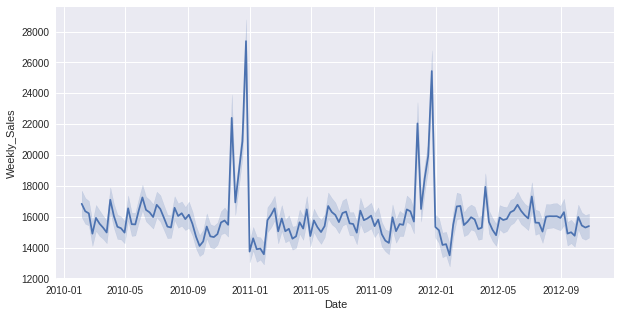

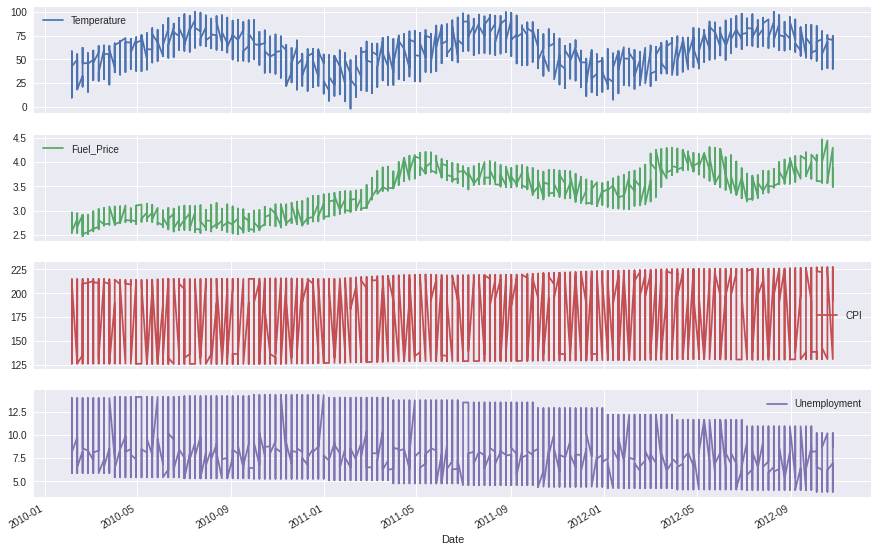

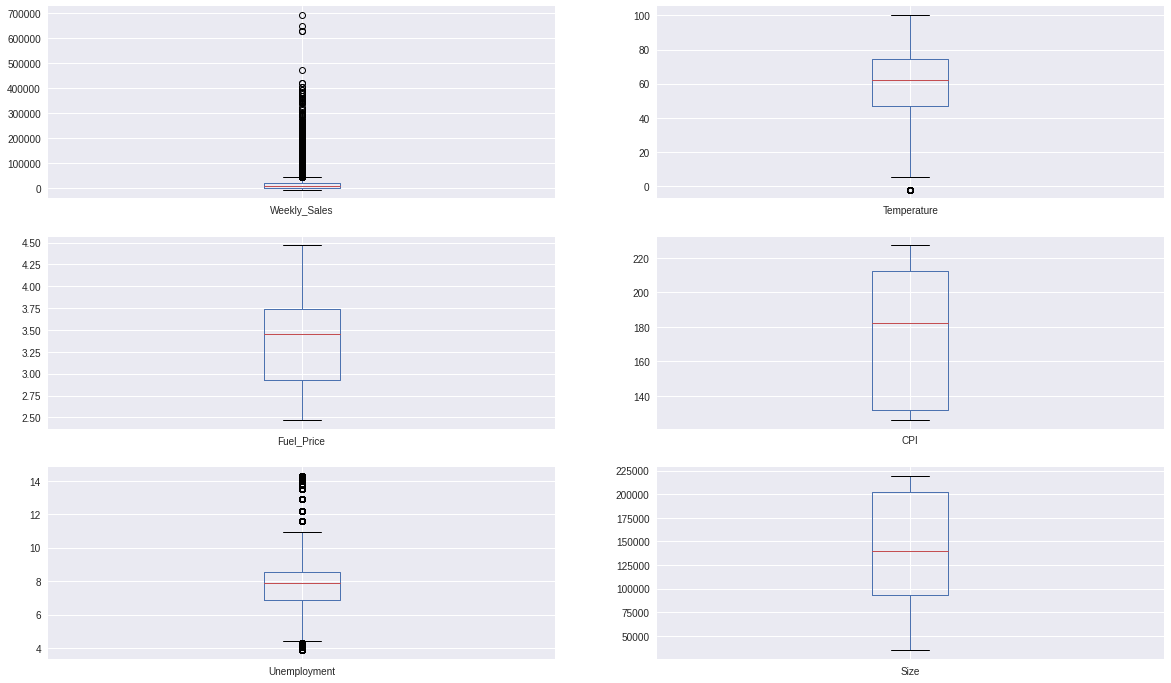

In [ ]:
#2: Data Visualizations

#Find any patterns with certain numerical variables over time 
plt.style.use('seaborn')
rcParams['figure.figsize'] = 10,5
sns.lineplot(x = 'Date', y = "Weekly_Sales", data = dftrain2);
dftrain2[['Date', 'Temperature', 'Fuel_Price', 'CPI', 
          'Unemployment']].plot(x='Date', subplots=True, figsize=(15,10))

#plot boxplot for numerical variables from data
dftrain0 = dftrain2.copy()
dftrain0[['Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Size']].plot(kind='box',subplots=1,layout=(3,2),figsize=(20,12))

plt.show()

#sales tend to peak around christmas time (October to December) and then go into a slump afterward (January to Feb)
#stays somewhat consistent through otherwise


In [ ]:
dftrain2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1,0,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1,0,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1,0,0


In [ ]:
dftrain2["month"] = dftrain2['Date'].dt.month
dftrain2 = dftrain2.drop(["Date"], axis=1)
dftrain2 = pd.get_dummies(dftrain2, columns=["month"])

dftest2["month"] = dftest2['Date'].dt.month
dftest2 = dftest2.drop(["Date"], axis=1)
dftest2 = pd.get_dummies(dftest2, columns=["month"])

dftrain2.head()
#Find correlation between variables and weekly sales
dftrain2corr = dftrain2[dftrain2.columns[:]].corr()['Weekly_Sales'][:]
dftrain2corr

#size seems to be the most correlated with weekly sales followed by store type and dept


Store          -0.085195
Dept            0.148032
Weekly_Sales    1.000000
IsHoliday       0.012774
Temperature    -0.002312
Fuel_Price     -0.000120
MarkDown1       0.047172
MarkDown2       0.020716
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown5       0.050465
CPI            -0.020921
Unemployment   -0.025864
Size            0.243828
Type_A          0.185417
Type_B         -0.131219
Type_C         -0.095388
month_1        -0.019867
month_2         0.000368
month_3        -0.007876
month_4        -0.004804
month_5        -0.002728
month_6         0.004789
month_7        -0.001731
month_8         0.001129
month_9        -0.012330
month_10       -0.010273
month_11        0.016193
month_12        0.040980
Name: Weekly_Sales, dtype: float64

In [ ]:
dftrain2

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,2,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,3,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,4,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,5,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
421566,45,94,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
421567,45,95,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
421568,45,97,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#3: train and test data and model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
dftrain3 = dftrain2.drop("Weekly_Sales", axis = 1)
X = dftrain3
y = dftrain2.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, stratify=None)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Print out the MSE, MAE, RMSE, and R2
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared (R^2):", r2_score(y_test, y_pred))

Mean Squared Error (MSE):  351225766.3733814
Mean Absolute Error (MAE):  12189.261925323675
Root Mean Squared Error (RMSE):  18741.018285391576
R-squared (R^2): 0.04814552942369521


In [ ]:
#Decision Tree
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

Mean Squared Error (MSE):  195891714.71303833
Mean Absolute Error (MAE):  7019.602740549217
Root Mean Squared Error (RMSE):  13996.132134023253
R^2: 0.46911524651570935


In [11]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

Mean Squared Error (MSE):  144247041.67412037
Mean Absolute Error (MAE):  6788.113342660374
Root Mean Squared Error (RMSE):  12010.288992115067
R^2: 0.6090771104220336
